<a href="https://colab.research.google.com/github/mahdid-lilia/CLA-BOOTCAMP/blob/master/Unit%204/Homeworks/%20Build_the_first_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
np.random.seed(1)

In [2]:
X= np.array([[0,0],
            [0,1],
            [1,0],
            [1,1]
             ])
Y=np.array([
            [0],
            [1],
            [1],
            [0]
])
X.shape, Y.shape

((4, 2), (4, 1))

By visualizing our data points, we notice that the two classes can not be separated by a linear boundary, thus, linear models such as logistic regression won't be able to solve this problem, NN can successfully approximate functions that do not follow linearity, so our model will be able to perform the function of the xor gate correctly 

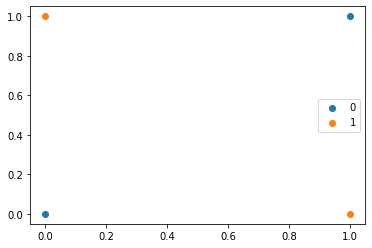

In [3]:
from matplotlib import pyplot as plt 
for i in range(2):
  s= np.where(Y.flatten()==i)
  plt.scatter(X[s].T[0], X[s].T[1], label=str(i))
plt.legend()
plt.show()

In [4]:
def sigmoid(X):
    return 1/(1+np.exp(-X))

In [21]:
def InitializeParametersHe(inputSize, hiddenLayerSize, outputSize):
    w1= np.random.randn(hiddenLayerSize, inputSize)* np.sqrt(2/inputSize)
    w2=np.random.randn(outputSize, hiddenLayerSize)  *np.sqrt(2/hiddenLayerSize)
    b1= np.zeros((hiddenLayerSize, 1))
    b2= np.zeros((outputSize,1) )   
    parameters={"W1":w1, "b1":b1, "W2": w2, "b2": b2}
    return parameters 

In [27]:
def forwardPropagation(X,Y, parameters):
    W1 ,W2, b1, b2= parameters["W1"],parameters["W2"], parameters["b1"], parameters["b2"]
    Z1= np.dot(X, W1.T)+b1.T
    A1=sigmoid(Z1)
    Z2=np.dot(A1, W2.T)+b2.T
    A2=sigmoid(Z2)
    cache =(Z1, A1, W1, b1, Z2 ,A2 ,W2 ,b2)
    cross_entropies= -(np.multiply(Y, np.log(A2)) + np.multiply((1-Y), np.log(1-A2)))
    cost= np.sum(cross_entropies)/ X.shape[0]
    return cost, cache, A2

In [39]:
from inspect import Parameter
def backwardPropagation(X, Y, cache):
  m=X.shape[0]
  (Z1, A1, W1, b1, Z2 ,A2 ,W2 ,b2)=cache 
  dZ2 = A2-Y
  dW2= np.dot( dZ2.T, A1)/m
  db2= np.sum(dZ2.T, axis=1, keepdims=True)
  dA1=np.dot(dZ2, W2)
  dZ1= np.multiply(dA1, A1* (1-A1))
  dW1= np.dot(dZ1.T, X)/m
  db1= np.sum(dZ1.T, axis=1, keepdims=True)/m
  gradients={"dZ2": dZ2, "dW2": dW2, "db2":db2, "dZ1":dZ1, "dW1":dW1, "db1":db1}
  return gradients 
 




In [54]:
 def updateParameters(parameters, gradients, learningRate):
    parameters["W1"]= parameters["W1"]- learningRate * gradients["dW1"]
    parameters["W2"]= parameters["W2"]- learningRate * gradients["dW2"]
    parameters["b1"]= parameters["b1"]- learningRate * gradients["db1"]
    parameters["b2"]= parameters["b2"]- learningRate * gradients["db2"]
    return parameters
    

In [55]:
hiddenLayerSize=2 #(2)
inputLayerSize= X.shape[1] #(2)
outputLayerSize= Y.shape[1] #(1)
parameters= InitializeParametersHe(inputLayerSize, hiddenLayerSize, outputLayerSize)


In [56]:
epoch= 10000
learningRate= 0.1
losses= np.zeros((epoch, 1))
for i in range(epoch):
  losses[i, 0], cache, A2= forwardPropagation(X,Y, parameters)
  gradients= backwardPropagation(X, Y, cache)
  parameters= updateParameters(parameters, gradients, learningRate)


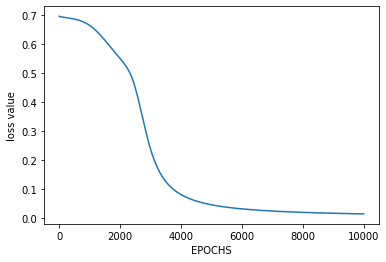

In [58]:
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("loss value")
plt.show()

In [60]:
cost, _, A2= forwardPropagation(X, Y, parameters)
prediction= (A2>0.5)* 1.0
print(cost)
print(prediction)

0.01300089161646585
[[0.]
 [1.]
 [1.]
 [0.]]


As we can see, the output is correct and our model is performing the task of xor gate perfectly which proves that the neural network can successfully predict the class of a function that is devided by a non linear decision boundary 